## Key Clouds

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 1.2 MB/s            
     |████████████████████████████████| 763 kB 41.4 MB/s            


In [3]:
!pip install pywaffle

     |████████████████████████████████| 565 kB 1.3 MB/s            


In [4]:
conda install -c conda-forge wordcloud

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py39hf3d152e_1         145 KB  conda-forge
    wordcloud-1.8.1            |   py39h3811e60_2         190 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         335 KB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/linux-64::wordcloud-1.8.1-py39h3811e60_2

The following packages will be UPDATED:

  certifi                          2021.10.8-py39hf3d152e_0 --> 2021.10.8-py39hf3d152e_1



certifi-2021.10.8

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import base64
import string
import re
import nltk

from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
#!pip install pywaffle
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
nltk.download('genesis')

[nltk_data] Downloading package genesis to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.


True

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
df = pd.read_csv('comments.csv')
df['textOriginal'] = df['textOriginal'].str.replace("\n" , "  ")
df['textOriginal'] = df['textOriginal'].str.replace("\'", " ")
df.head()

,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,likeCount,publishedAt,updatedAt,videoTitle,videoDate
0,ehmyaX0lJew,En tant qu&#39;Empire constitutionnel très dém...,En tant qu Empire constitutionnel très démocra...,Empire constitutionnel très démocratique popul...,https://yt3.ggpht.com/K0X_3b-85c-4oYqe8jDIsL4T...,http://www.youtube.com/channel/UC-9hLSaVRQZ8Na...,UC-9hLSaVRQZ8Naa4Ynrf9Pw,True,none,2992,2021-11-01T16:58:52Z,2021-11-01T16:58:52Z,La vie est-elle un (gros) coup de chance ? - D...,2022-01-01T17:18:55Z
1,ehmyaX0lJew,Une idée d’hymne pour le pays ? 🤔,Une idée d’hymne pour le pays ? 🤔,YouTube,https://yt3.ggpht.com/584JjRp5QMuKbyduM_2k5RlX...,http://www.youtube.com/channel/UCBR8-60-B28hp2...,UCBR8-60-B28hp2BmDPdntcQ,True,none,904,2021-11-04T18:46:45Z,2021-11-04T18:46:45Z,La vie est-elle un (gros) coup de chance ? - D...,2022-01-01T17:18:55Z
2,ehmyaX0lJew,Je veux absolument un passeport de Dirtybiolog...,Je veux absolument un passeport de Dirtybiolog...,Dark,https://yt3.ggpht.com/Cv3SNTMi0KHR4x3goJUK7VlR...,http://www.youtube.com/channel/UC6hZ64RB21tnY-...,UC6hZ64RB21tnY-M7jfguuzg,True,none,5,2021-11-26T15:00:01Z,2021-11-26T15:00:01Z,La vie est-elle un (gros) coup de chance ? - D...,2022-01-01T17:18:55Z
3,ehmyaX0lJew,&quot;Ce sera internet le territoire&quot; ça ...,"""Ce sera internet le territoire"" ça me fait me...",Do,https://yt3.ggpht.com/ytc/AKedOLSR54io4bDtzKIN...,http://www.youtube.com/channel/UC91xKGD78Fjsyi...,UC91xKGD78FjsyijwAKSEBpw,True,none,525,2021-11-02T10:18:34Z,2021-11-02T10:21:44Z,La vie est-elle un (gros) coup de chance ? - D...,2022-01-01T17:18:55Z
4,ehmyaX0lJew,Je veux absolument un passeport de Dirtybiolog...,Je veux absolument un passeport de Dirtybiolog...,Jeffrey 75,https://yt3.ggpht.com/ytc/AKedOLRDIEz77_NQDNnm...,http://www.youtube.com/channel/UCIOWsD3jQ44JZA...,UCIOWsD3jQ44JZA2E1DNgZTg,True,none,109,2021-11-02T08:12:55Z,2021-11-02T08:12:55Z,La vie est-elle un (gros) coup de chance ? - D...,2022-01-01T17:18:55Z


## Tokenisation

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
#df['textOriginal'] = df['textOriginal'].str.replace(",", " ")
#df['textOriginal'] = df['textOriginal'].str.replace(".", " ")
#df['textOriginal'] = df['textOriginal'].str.replace("'", " ")
#df['textOriginal'] = df['textOriginal'].str.replace("''", " ")
#df['textOriginal'] = df['textOriginal'].str.replace('``', " ")
#df['textOriginal'] = df['textOriginal'].str.replace('!', " ")
#df['textOriginal'] = df['textOriginal'].str.replace('?', " ")

dumas = " ".join(df['textOriginal'])
type(dumas)

str

In [11]:
import re

def clean_text(text):
    text = text.lower() # mettre les mots en minuscule
    text = " ".join(text.split())
    return text

dumas = clean_text(dumas)

In [12]:
words = nltk.word_tokenize(dumas, language='french')
words[1030:1050]

['a',
 'fasciné',
 'du',
 'début',
 'à',
 'la',
 'fin',
 'alors',
 'que',
 'j',
 'aurais',
 'pas',
 'forcément',
 'miser',
 'dessus',
 'quand',
 'j',
 'ai',
 'vu',
 'le']

In [13]:
words = [word for word in words if word.isalpha()]
words[1030:1050]

['représentation',
 'internationale',
 'avec',
 'des',
 'ambassabes',
 'par',
 'exemple',
 'ainsi',
 'que',
 'rédiger',
 'tes',
 'communiqués',
 'selon',
 'un',
 'protocole',
 'précis',
 'la',
 'reconnaissance',
 'est',
 'la']

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Retirer les stopwords

In [14]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
#print(stopwords.words("french"))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
stop_words = set(stopwords.words('french'))

words = [w for w in words if not w in stop_words]
print(words[1030:1050])

['discords', 'perdu', 'trouve', 'cette', 'experience', 'formidable', 'vraiment', 'collab', 'fouloscopie', 'idée', 'génie', 'tout', 'comme', 'reste', 'vidéo', 'réalité', 'viens', 'découvrir', 'chaine', 'fais']


## Stemming

In [ ]:
# ne garder que la racine des mots
# pas idéal pour créer des key clouds

## Reconnaissance des entités nommées

In [29]:
#!pip install deplacy
#!python -m spacy download fr_core_news_sm
#import pkg_resources,imp
#imp.reload(pkg_resources)
import spacy
from spacy import displacy

In [49]:
nlp=spacy.load("fr_core_news_sm")
doc = nlp(dumas)
#displacy.render(doc, style="ent", jupyter=True)

## Word Cloud

In [17]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
text = " ".join(words)
type(text)

str

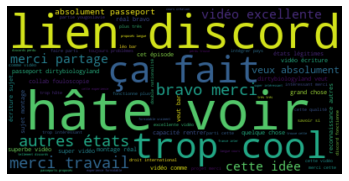

In [20]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

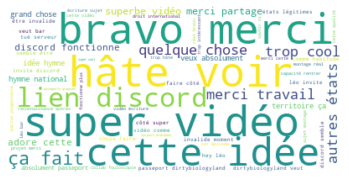

In [92]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=60, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [93]:
# Save the image in the img folder:
wordcloud.to_file("img:first_review.png")

### Autre essai

In [24]:
mask = np.array(Image.open("img:mask.png"))
#mask

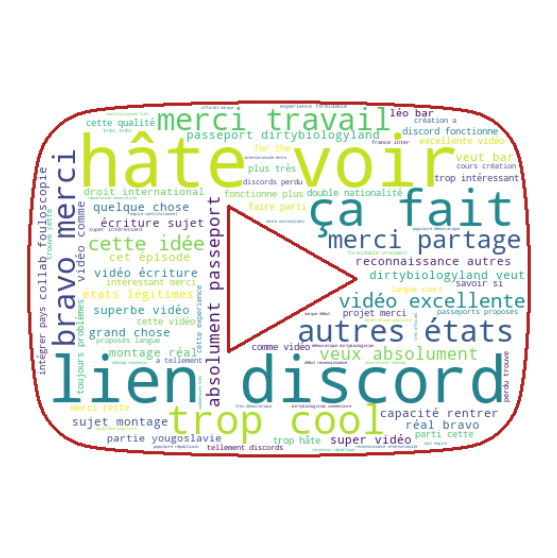

In [28]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=90, mask=mask,
               stopwords=stop_words, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("img:logo_youtube.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()